In [2]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Tutorial 

## Aim

Scripts to compute and analyse the R-factor of the RUSLE-equation. The
R-factor is a measure for the total erosivity of a number of rainfall events
within a defined timeframe (year, month, number of days). The factor is
computed by calculating the yearly sum of -for every rainfall event- the sum
of the depth of rainfall (mm) and the kinetic energy, and taking the mean
over all years.

---
**NOTE**

This notebook does not include the erosivity computation based on the RMI rainfall data.
Untill this  date, RMI has decided to not provide their rainfall data in an open data format.
One can contact RMI to obtain the rainfall input data. Alternatively, the results
computation of the erosivity values are provided in this notebook, so one can proceed with the analysis.
---

## Imports
Main imports

In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Package imports

In [4]:
from rfactor.process import load_rain_folder, compute_rainfall_statistics, get_rfactor_station_year
from rfactor.rfactor import compute_erosivity, maximum_intensity_matlab_clone

Working directory

In [5]:
cwd = Path().resolve()

**Set folders**  
The input files are defined by text files (extension: .txt) that hold non-zero rainfall timeseries. The data are split per station and per year with a specific datafile tag:  

KMI_6414_2004.txt  
KMI_6414_2005.txt  
...  
KMI_6434_2003.txt  
KMI_6434_2004.txt  
...  

In [74]:
fmap_rainfall=  Path(r"../../tests/data/test_rainfalldata")
fmap_erosivity = Path(r"../../tests/data/test_erosivitydata")
fmap_results = Path.cwd() / "results"

## Input data and compute erosivity
Note: the files in `tests/data/test_rainfalldata` are an incomplete data set for Belgium (RMI rainfall data are not included), an alternative is provided in the section 'Analysis'. 

In [75]:
all_rainfall = load_rain_folder(fmap_rainfall)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 581/581 [00:08<00:00, 67.75it/s]


**Compute rainfall statistics** (and add station metadata)

In [76]:
stations=pd.read_csv("data/belgium/stations.csv")
compute_rainfall_statistics(all_rainfall,stations)

,year,location,x,y,records,min,median,max
0,[2018],NaN,NaN,NaN,2718,0.01,0.09,5.05
1,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Zarren,51907.0,191193.0,56546,0.01,0.10,24.32
2,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Ieper,45836.0,171260.0,54543,0.01,0.10,22.75
3,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Sint-Joris,37391.0,203053.0,52304,0.01,0.10,21.61
4,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...",De Panne,25566.0,198775.0,36628,0.01,0.12,15.75
5,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...",Poperinge,30383.0,169639.0,29856,0.01,0.15,15.30
6,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Oostkamp,71934.0,203046.0,56891,0.01,0.11,17.91
7,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Klemskerke,54903.0,213712.0,53213,0.01,0.11,15.02
8,"[2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...",Dudzele,73428.0,219889.0,25318,0.01,0.12,15.31
9,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Vinderhoute,100117.0,197676.0,62341,0.01,0.10,15.11


**Select stations to compute erosivity for**

In [80]:
consider_stations = pd.read_csv("../../tests/data/files_tests.csv")
sel_rainfall = all_rainfall.loc[all_rainfall["tag"].isin(consider_stations["datafile"])]

In [81]:
sel_rainfall

,minutes_since,rain_mm,datetime,station,year,tag
0,130,0.27,2018-01-01 02:10:00,P01_001,2018,P01_001_2018
1,140,0.02,2018-01-01 02:20:00,P01_001,2018,P01_001_2018
2,190,0.48,2018-01-01 03:10:00,P01_001,2018,P01_001_2018
3,460,0.22,2018-01-01 07:40:00,P01_001,2018,P01_001_2018
4,470,0.09,2018-01-01 07:50:00,P01_001,2018,P01_001_2018
...,...,...,...,...,...,...
1979660,526990,0.11,2012-12-31 23:10:00,P11_043,2012,P11_043_2012
1979661,527000,0.16,2012-12-31 23:20:00,P11_043,2012,P11_043_2012
1979662,527010,0.11,2012-12-31 23:30:00,P11_043,2012,P11_043_2012
1979663,527020,0.09,2012-12-31 23:40:00,P11_043,2012,P11_043_2012


**Run Model**  

In [82]:
erosivity = compute_erosivity(sel_rainfall,maximum_intensity_matlab_clone)

## Analysis (in Dutch)
If one does not have acces to the RMI data, the output erosivity from the computation are provided in this repository as an alternative.

In [83]:
erosivity = pd.read_csv("data/erosivity_belgium.csv")
erosivity.index = pd.to_datetime(erosivity["datetime"])

**Ukkel**  
Compute R-value for specific years for Ukkel (KMI_6447 and KMI_F3)

In [84]:
timeseries = [range(1898,2003,1),
              range(2003,2021,1),
              range(1898,2021,1),
              range(1996,2021,1),
              range(1991,2021,1),
              range(1990,2001,1),
              range(2000,2021,1)]
for i in timeseries:
    rfactor = get_rfactor_station_year(erosivity,["KMI_6447","KMI_FS3"], i)
    print(rfactor["erosivity_cum"].mean())

1013.447979703528
1336.3976282113254
1060.708903875401
1296.983053012192
1288.9563623716533
1125.5684373036177
1331.8310591237405


**Make figure for Ukkel**

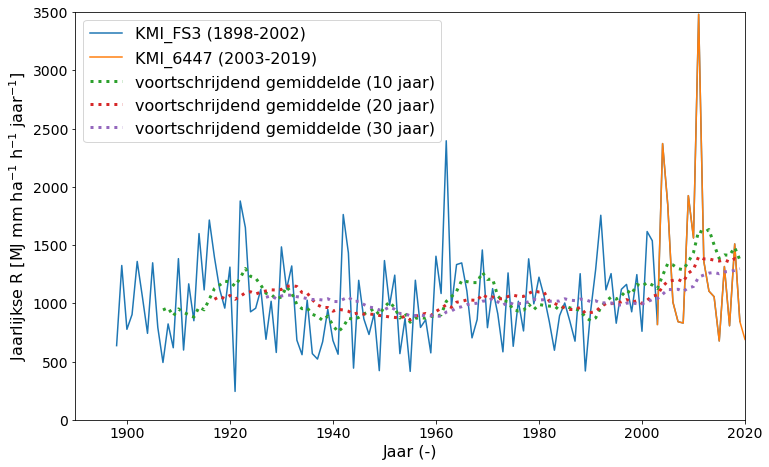

In [85]:
plt.figure(figsize=[12,7.5])

years = range(1898,2020,1)
rfactor_all=get_rfactor_station_year(erosivity,["KMI_6447","KMI_FS3"], years)
rfactor_all=rfactor_all[~(rfactor_all["erosivity_cum"].isnull())].sort_values("year")
plt.plot(rfactor_all["year"],rfactor_all["erosivity_cum"],label="KMI_FS3 (1898-2002)")

years = range(2003,2021,1)
rfactor_30=get_rfactor_station_year(erosivity,["KMI_6447","KMI_FS3"], years)
rfactor_30=rfactor_30[~(rfactor_30["erosivity_cum"].isnull())].sort_values("year")
plt.plot(rfactor_30["year"],rfactor_30["erosivity_cum"],label="KMI_6447 (2003-2019)")

# rolling mean
scales  = [10,20,30]
for scale in scales:
    y = rfactor_all["erosivity_cum"].rolling(scale).mean()
    x = y.index+1898
    plt.plot(x,y,ls=':',lw=3,label=f'voortschrijdend gemiddelde ({scale} jaar)')
plt.ylim([0,3500])
plt.xlim([1890,2020])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel(r'Jaar (-)',fontsize=16)
plt.ylabel(r'Jaarlijkse R [MJ mm ha$^{-1}$ h$^{-1}$ jaar$^{-1}$]',fontsize=16)
plt.legend(prop={'size':16})

**All stations expect Ukkel**

In [86]:
stations_belgium_excl_ukkel = [station for station in stations["station"] if station not in ["KMI_6447","KMI_FS3"]]
years = range(1898,2021,1)
rfactor_non_ukkel = get_rfactor_station_year(erosivity,stations_belgium_excl_ukkel, years)
print(rfactor_non_ukkel["erosivity_cum"].mean())
len(rfactor_non_ukkel["station"].unique())

1257.3797354784426


55

**All stations flanders**

In [87]:
stations_flanders = [station for station in stations["station"] if station not in  ["KMI_6447","KMI_FS3","KMI_6455","KMI_6459","KMI_6472","KMI_6494","KMI_6484"]]
years = range(1898,2021,1)
rfactor_flanders = get_rfactor_station_year(erosivity,stations_flanders, years)
print(rfactor_flanders["erosivity_cum"].mean())
len(rfactor_flanders["station"].unique())

1237.307580493159


50

**Plot the distribution of all R-values for Belgium, excluding the data from Ukkel**

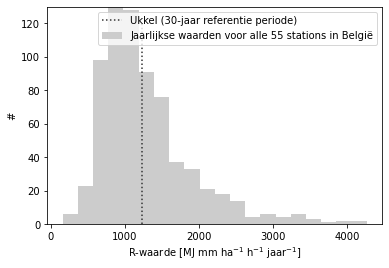

In [88]:
rfactor_non_ukkel = get_rfactor_station_year(erosivity,stations_belgium_excl_ukkel, range(1991, 2021))
plt.hist(rfactor_non_ukkel["erosivity_cum"],20,color=[0.8]*3,label=r"Jaarlijkse waarden voor alle 55 stations in België")
plt.plot([1239,1239],[0,120],color=[0.2]*3,ls=":",label="Ukkel (30-jaar referentie periode)")
plt.ylabel(r"#")
plt.xlabel(r"R-waarde [MJ mm ha$^{-1}$ h$^{-1}$ jaar$^{-1}$]")
plt.ylim([0,130])
plt.legend()

**All stations of the VMM (Flanders)**

In [89]:
erosivity

,datetime,datetime.1,event_rain_cum,max_30min_intensity,event_energy,erosivity,all_event_rain_cum,erosivity_cum,station,year,tag
datetime,,,,,,,,,,,
2004-01-07 12:30:00,2004-01-07 12:30:00,2004-01-07 12:30:00,7.40,10.60,1.642414,17.409589,0.00,17.409589,KMI_6414,2004,KMI_6414_2004
2004-01-08 11:30:00,2004-01-08 11:30:00,2004-01-08 11:30:00,5.90,4.80,0.977963,4.694222,7.40,22.103810,KMI_6414,2004,KMI_6414_2004
2004-01-11 05:40:00,2004-01-11 05:40:00,2004-01-11 05:40:00,8.10,4.80,1.242868,5.965767,14.50,28.069577,KMI_6414,2004,KMI_6414_2004
2004-01-11 19:30:00,2004-01-11 19:30:00,2004-01-11 19:30:00,7.10,9.60,1.611688,15.472204,22.60,43.541781,KMI_6414,2004,KMI_6414_2004
2004-01-12 08:40:00,2004-01-12 08:40:00,2004-01-12 08:40:00,21.40,9.60,3.684080,35.367172,29.70,78.908954,KMI_6414,2004,KMI_6414_2004
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14 18:50:00,2020-12-14 18:50:00,2020-12-14 18:50:00,6.11,1.42,0.636761,0.904201,584.59,785.585714,P11_043,2020,P11_043_2020
2020-12-21 10:20:00,2020-12-21 10:20:00,2020-12-21 10:20:00,6.42,2.04,0.737794,1.505099,591.69,787.090813,P11_043,2020,P11_043_2020
2020-12-22 15:30:00,2020-12-22 15:30:00,2020-12-22 15:30:00,16.38,3.86,2.317770,8.946592,598.11,796.037405,P11_043,2020,P11_043_2020


In [90]:
stations_vmm = [station for station in stations["station"] if "KMI" not in station]
rfactor_vmm=get_rfactor_station_year(erosivity)
print(rfactor_vmm["erosivity_cum"].mean())
len(rfactor_vmm["station"].unique())

1228.1916061927986


59

In [91]:
erosivity

,datetime,datetime.1,event_rain_cum,max_30min_intensity,event_energy,erosivity,all_event_rain_cum,erosivity_cum,station,year,tag
datetime,,,,,,,,,,,
2004-01-07 12:30:00,2004-01-07 12:30:00,2004-01-07 12:30:00,7.40,10.60,1.642414,17.409589,0.00,17.409589,KMI_6414,2004,KMI_6414_2004
2004-01-08 11:30:00,2004-01-08 11:30:00,2004-01-08 11:30:00,5.90,4.80,0.977963,4.694222,7.40,22.103810,KMI_6414,2004,KMI_6414_2004
2004-01-11 05:40:00,2004-01-11 05:40:00,2004-01-11 05:40:00,8.10,4.80,1.242868,5.965767,14.50,28.069577,KMI_6414,2004,KMI_6414_2004
2004-01-11 19:30:00,2004-01-11 19:30:00,2004-01-11 19:30:00,7.10,9.60,1.611688,15.472204,22.60,43.541781,KMI_6414,2004,KMI_6414_2004
2004-01-12 08:40:00,2004-01-12 08:40:00,2004-01-12 08:40:00,21.40,9.60,3.684080,35.367172,29.70,78.908954,KMI_6414,2004,KMI_6414_2004
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14 18:50:00,2020-12-14 18:50:00,2020-12-14 18:50:00,6.11,1.42,0.636761,0.904201,584.59,785.585714,P11_043,2020,P11_043_2020
2020-12-21 10:20:00,2020-12-21 10:20:00,2020-12-21 10:20:00,6.42,2.04,0.737794,1.505099,591.69,787.090813,P11_043,2020,P11_043_2020
2020-12-22 15:30:00,2020-12-22 15:30:00,2020-12-22 15:30:00,16.38,3.86,2.317770,8.946592,598.11,796.037405,P11_043,2020,P11_043_2020


**Compute values per year over all stations**

In [92]:
get_rfactor_station_year(erosivity).groupby("station").aggregate({"erosivity_cum":[np.mean,np.std],"year":lambda x:len(x)}).sort_values(('year', '<lambda>'),ascending=False).reset_index()

station erosivity_cum                  year
                      mean          std <lambda>
0    KMI_FS3   1013.447980   372.030461      105
1   KMI_6459   1342.419073   585.411025       20
2   KMI_6455   1203.791757   578.286308       20
3   KMI_6434   1395.650915   505.788697       18
4   KMI_6472   1283.746950   664.442273       18
5   KMI_6447   1336.397628   717.022599       18
6   KMI_6484   1447.547987   410.672521       17
7   KMI_6414   1351.436871   657.902434       17
8    P11_007   1293.762120   498.526282       16
9    P08_009   1312.770803   784.515398       16
10   P09_016   1277.558439   605.450071       16
11   P03_017   1492.972795   641.917534       16
12   P03_005   1282.562029   415.816142       16
13   P08_018   1377.282162   796.665508       16
14   P02_008   1107.936325   413.800105       16
15   P02_004   1378.959393   909.600748       16
16   P08_013   1189.783684   545.068058       16
17   P01_015   1090.112730   437.259380       16
18   P01_010   1449.691160   622.033426       16
19   P01_003   1418.290092   767.219120       16
20   P07_006   1044.724301   409.969541       16
21   P09_012   1152.069795   484.212211       16
22   P06_014   1071.548622   278.587932       15
23   P10_011   1150.559920   413.434757       15
24   P11_002   1277.225780   718.007959       15
25  KMI_6477   1345.682044   658.148797       15
26   P05_019    834.893640   187.452290       14
27   P07_021   1024.883579   567.140448       14
28   P07_022   1290.671931   447.699099       14
29   P11_024   1448.570922  1059.335762       14
30   P04_020   1155.457860   585.477272       13
31   P04_001   1537.649048   485.756724       13
32  KMI_6439   1169.529461   480.978707       13
33   P08_031   1198.694291   611.355465       12
34   P08_028   1137.982185   728.176289       12
35   P09_025   1142.020684   533.306992       12
36   P09_032   1399.275294   850.543054       12
37   P09_026   1102.756760   559.757068       12
38   P04_027   1210.151071   425.203837       12
39   P06_040   1083.610845   320.083690       12
40   P03_041   1066.256349   364.446664       12
41   P01_029   1332.382381   996.246264       12
42   P05_039   1362.462917   670.997759       12
43   P03_036   1462.484563   844.271765       12
44   P01_037    886.616101   279.273285       12
45   P11_043   1388.573908   868.620922       12
46   P08_033   1423.522459   620.629392       11
47   P09_034   1157.774954   462.258067       11
48   P09_035   1670.461762   945.339789       11
49   P08_023   1040.904464   454.344420       10
50   P10_042   1237.331122   565.793083       10
51   P02_030   1077.718705   323.032167        9
52   P05_038    968.648040   238.527416        9
53  KMI_6418    823.844453   377.651136        8
54  KMI_6494   2378.797416   812.871388        8
55  KMI_6464   1121.448030   584.265294        8
56  KMI_6431   1042.802421   271.880632        6
57   P04__01   1050.077755   645.674255        2
58   P01_001    410.447246          NaN        1

## Analysis (monthly resolution, in Dutch)
Get the EI30-values for 2018 based on two Ukkel station ("KMI_6447","KMI_FS3")  

In [93]:
erosivity_monthly = erosivity["erosivity"].loc[erosivity["station"].isin(["KMI_6447","KMI_FS3"])].resample("M").sum().to_frame()

In [94]:
erosivity_monthly["month"] = erosivity_monthly.index.month

In [95]:
em = erosivity_monthly.groupby("month").aggregate({"erosivity":[np.mean,lambda x:np.percentile(x,25),lambda x:np.percentile(x,75)]})

In [96]:
em["mean"] = em["erosivity"]["mean"]
em["l_e"] = em["erosivity"]["mean"]-em["erosivity"]["<lambda_0>"]
em["u_e"] = em["erosivity"]["<lambda_1>"]-em["erosivity"]["mean"]

In [97]:
em

erosivity                               mean         l_e        u_e
             mean <lambda_0>  <lambda_1>                                   
month                                                                      
1       39.133796  16.920618   53.336438   39.133796   22.213177  14.202642
2       27.215990  10.029274   37.923135   27.215990   17.186715  10.707145
3       33.509429  14.385286   46.768732   33.509429   19.124143  13.259303
4       37.799479  17.213917   46.102335   37.799479   20.585562   8.302856
5       96.224409  29.477947  112.743560   96.224409   66.746461  16.519151
6      130.780288  37.011502  189.230319  130.780288   93.768787  58.450031
7      247.616610  64.505239  328.531664  247.616610  183.111371  80.915053
8      176.892645  58.274647  220.621763  176.892645  118.617998  43.729118
9      105.283020  33.473290  126.007565  105.283020   71.809731  20.724544
10      73.353482  25.118608   84.890759   73.353482   48.234874  11.537276
11      49.241269  21.334247   62.153328   49.241269   27.907022  12.912059
12      43.658486  20.036902   60.874211   43.658486   23.621584  17.215725

**Plot**

Text(0, 0.5, 'R-waarde [MJ mm ha$^{-1}$ h$^{-1}$ maand$^{-1}$]')

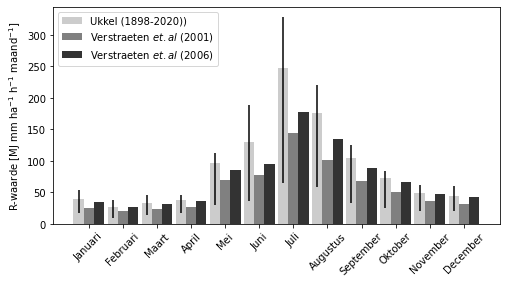

In [98]:
fig = plt.figure(figsize=(8,4))
x = np.arange(len(em))
y_gv = [26,20,24,27,70,77,144,102,68,50,37,32]
y_gv2 = [35,27,32,36,86,96,177,135,89,66,48,43]
plt.bar(x-0.3,em["mean"],yerr=em[["l_e","u_e"]].T.values,color=[0.80]*3,width=0.3,label="Ukkel (1898-2020))")
plt.bar(x,y_gv,width=0.3,color=[0.5]*3,label="Verstraeten $\it{et. al}$ (2001)")
plt.bar(x+0.3,y_gv2,width=0.3,color=[0.2]*3,label="Verstraeten $\it{et. al}$ (2006)")
plt.ylabel("R-value")
ax = fig.axes
plt.xticks(x,["Januari","Februari","Maart","April","Mei","Juni","Juli","Augustus","September","Oktober","November","December"],rotation=45)
plt.legend(loc=2,facecolor ="white")
plt.ylabel(r"R-waarde [MJ mm ha$^{-1}$ h$^{-1}$ maand$^{-1}$]")

## Additional: monthly analysis (detail)
**Evolution monthly R-value**
Generate plot to analyse evolution of montly R over the years

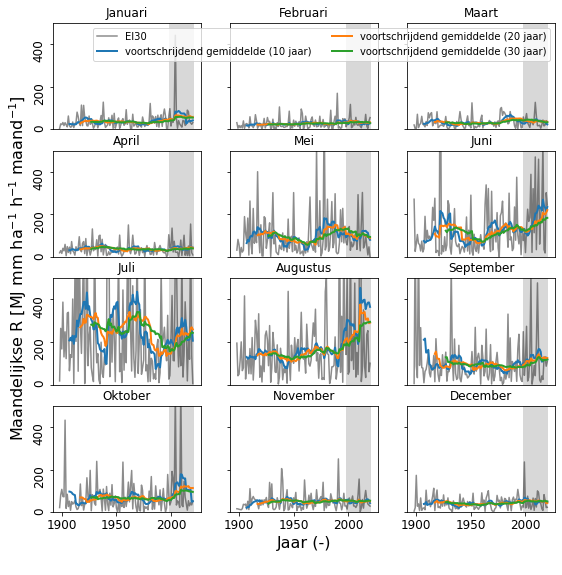

In [99]:
def subplot_montlhy_R(df,ax,ind1,ind2):
    
    if (ind1==0) & (ind2==2):
        ax.plot(df["year"],df["erosivity"],color=[0.1]*3,alpha=0.5,label="EI30")
    else:
        ax.plot(df["year"],df["erosivity"],color=[0.1]*3,alpha=0.5)
    ax.fill_between([1998,2021], 0,500,facecolor='grey', alpha=0.3)    
    # rolling mean
    scales  = [10,20,30]
    for scale in scales:
        y = df["erosivity"].reset_index().rolling(scale).mean()
        if scale==10:
            y_max=np.nanmax(y.values)*1.1
        x = y.index+1898
        ax.plot(x,y,lw=2,label=f'voortschrijdend gemiddelde ({scale} jaar)')
    if ind1!=3:
        ax.set_xticks([])
    else:
        if ind2==1:
            ax.set_xlabel(r'Jaar (-)',fontsize=16)
    ax.set_ylim([0,500])
    ax.set_title(name)
    ax.tick_params(axis='y', which='major', labelsize=12,rotation=90)
    ax.tick_params(axis='x', which='major', labelsize=12)
    if ind2!=0:
        ax.set_yticklabels([])
    else:
        if ind1==2:
            ax.set_ylabel('\t\t\t Maandelijkse R [MJ mm ha$^{-1}$ h$^{-1}$ maand$^{-1}$]',fontsize=16)
    if (ind1==0) & (ind2==2):
        ax.legend(ncol=2)
        
fig,ax = plt.subplots(4,3,figsize=[9,9])
months = ["Januari","Februari","Maart","April","Mei","Juni","Juli","Augustus","September","Oktober","November","December"]
erosivity_monthly["year"] = erosivity_monthly.index.year

for month,name in enumerate(months):
    ind1=int(np.floor((month)/3))
    ind2=np.mod(month,3)
    df_plot = erosivity_monthly.loc[erosivity_monthly["month"]==month+1]
    df_plot  = df_plot [~np.isnan(df_plot["erosivity"])].sort_values("year")
    subplot_montlhy_R(df_plot,ax[ind1,ind2],ind1,ind2)

